In [341]:
import os.path

In [38]:
import numpy as np

In [147]:
import numpy.linalg as LA

In [1]:
from PIL import Image

In [26]:
from random import shuffle

In [5]:
def show_normals(npnorms):
    return Image.fromarray(((npnorms+1)/2*254).astype(np.uint8))

In [339]:
Indices = list(range(1,33));

In [33]:
Indices.remove(8)

In [61]:
shuffle(Indices)

In [324]:
Indices = [1,2,3,4,100,101,102,103,1500,1574,347,90]

In [108]:
bool(len(Indices))

True

In [140]:
norm = np.asarray(Image.open('./DataSet/NORM/'+str(1).zfill(6)+'.png'))

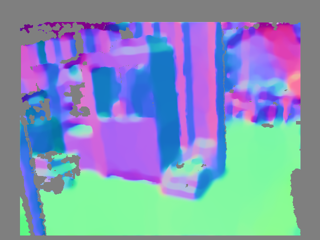

In [141]:
Image.fromarray(norm)

In [323]:
def get_batch(batch_size=32):
    
        images = np.zeros([batch_size, 240, 320, 3], dtype=np.float32)
        normals = np.zeros([batch_size, 240, 320, 3], dtype=np.float32)

        for i in range(batch_size):
            if len(Indices): 
                ni = Indices.pop()
                images[i,:,:,:] = np.asarray(Image.open('./DataSet/RGB/'+str(ni).zfill(6)+'.png'))
                normals[i,:,:,:] = np.asarray(Image.open('./DataSet/NORM/'+str(ni).zfill(6)+'.png'))
        # Convert to range [-1,+1]
        normals = ((normals / 254)*2)-1
        # Mask of valid normals
        norml2 = LA.norm(normals,axis=3)
        mask = (norml2 > 0.5).astype(np.float32)
        mask3 = np.repeat(np.expand_dims(mask,3),3,3)
        # Normalise
        normals = np.divide(normals,np.expand_dims(norml2,3))
        normals = np.nan_to_num(normals)
        # Apply mask
        normals = np.multiply(normals,mask3)
        
        return images,normals

In [340]:
img,norm = get_batch(32)

/home/raman/Applications/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


In [334]:
img.shape

(5, 240, 320, 3)

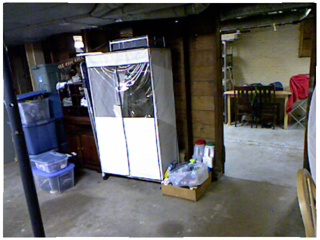

In [338]:
Image.fromarray(img[1].astype(np.uint8))

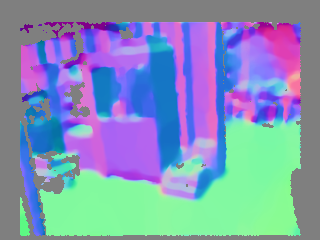

In [337]:
show_normals(norm[1])

In [285]:
norm = np.nan_to_num(np.divide(norm,np.reshape(LA.norm(norm,axis=3), (5,240,320,1))))

/home/raman/Applications/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [204]:
np.unique(norm)

array([-1.        , -0.99996585, -0.99992937, ...,  0.99996901,
        0.99996948,  1.        ], dtype=float32)

In [299]:
np.unique(LA.norm(norm,axis=3))

array([ 0.        ,  0.99999982,  0.99999988,  0.99999994,  1.        ,
        1.00000012], dtype=float32)

In [281]:
mask = (LA.norm(norm,axis=3) > 0.5).astype(np.float)

In [282]:
mask3 = np.repeat(np.expand_dims(mask,3),3,3)

In [287]:
temp = np.multiply(norm,mask3)

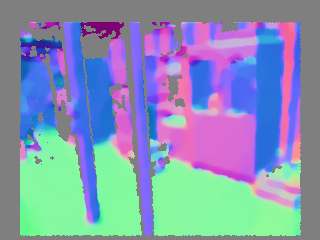

In [288]:
show_normals(temp[2])

In [353]:
def init():
    Indices = []
    for i in range(3000):
        rgb = './DataSet/RGB/'+str(i).zfill(6)+'.png'
        norm = './DataSet/NORM/'+str(i).zfill(6)+'.png'
        if os.path.isfile(rgb) and os.path.isfile(norm):
            Indices.append(i)
        else:
            print(str(i),' MISSING')
    return Indices

In [354]:
ii = init()

0  MISSING
1748  MISSING
1749  MISSING
1750  MISSING
1751  MISSING
1752  MISSING
1753  MISSING
1754  MISSING
1755  MISSING
1756  MISSING
1757  MISSING
1758  MISSING
1759  MISSING
1760  MISSING
1761  MISSING
1762  MISSING
1763  MISSING
1764  MISSING
1765  MISSING
1766  MISSING
1767  MISSING
1768  MISSING
1769  MISSING
1770  MISSING
1771  MISSING
1772  MISSING
1773  MISSING
1774  MISSING
1775  MISSING
1776  MISSING
1777  MISSING
1778  MISSING
1779  MISSING
1780  MISSING
1781  MISSING
1782  MISSING
1783  MISSING
1784  MISSING
1785  MISSING
1786  MISSING
1787  MISSING
1788  MISSING
1789  MISSING
1790  MISSING
1791  MISSING
1792  MISSING
1793  MISSING
1794  MISSING
1795  MISSING
1796  MISSING
1797  MISSING
1798  MISSING
1799  MISSING
1800  MISSING
1801  MISSING
1802  MISSING
1803  MISSING
1804  MISSING
1805  MISSING
1806  MISSING
1807  MISSING
1808  MISSING
1809  MISSING
1810  MISSING
1811  MISSING
1812  MISSING
1813  MISSING
1814  MISSING
1815  MISSING
1816  MISSING
1817  MISSING
1818  MIS

2981  MISSING
2982  MISSING
2983  MISSING
2984  MISSING
2985  MISSING
2986  MISSING
2987  MISSING
2988  MISSING
2989  MISSING
2990  MISSING
2991  MISSING
2992  MISSING
2993  MISSING
2994  MISSING
2995  MISSING
2996  MISSING
2997  MISSING
2998  MISSING
2999  MISSING


In [358]:
shuffle(ii)

In [360]:
ii.pop()

412

In [3]:
import os.path
import random
import numpy as np
import numpy.linalg as LA
from PIL import Image

path = './DataSet/'

class Dataset:
    
    def __init__(self,subset=1.0):    
        self.Indices = []
        for i in range(1,252885):
            rgb = path+'RGB/'+str(i).zfill(6)+'.png'
            norm = path+'NORM/'+str(i).zfill(6)+'.png'
            if os.path.isfile(rgb) and os.path.isfile(norm):
                self.Indices.append(i)
            #else:
            # print('Frame No. ',str(i),' IS MISSING')
        random.seed(7)
        random.shuffle(self.Indices)
        self.size = int(subset*len(self.Indices))
    
    def get_batch(self,batch_size=32):
        # Initialisation
        images = np.zeros([batch_size, 240, 320, 3], dtype=np.float32)
        normals = np.zeros([batch_size, 240, 320, 3], dtype=np.float32)
        # Loading images
        for i in range(batch_size):
            if len(self.Indices): 
                ni = self.Indices.pop()
                images[i,:,:,:] = np.asarray(Image.open(path+'RGB/'+str(ni).zfill(6)+'.png'))
                normals[i,:,:,:] = np.asarray(Image.open(path+'NORM/'+str(ni).zfill(6)+'.png'))
        
        # Convert to range [-1,+1]
        normals = ((normals / 254)*2)-1
        # Mask of valid normals
        norml2 = LA.norm(normals,axis=3)
        mask = (norml2 > 0.5).astype(np.float32)
        mask3 = np.repeat(np.expand_dims(mask,3),3,3)
        # Normalise
        normals = np.divide(normals,np.expand_dims(norml2,3))
        normals = np.nan_to_num(normals)
        # Apply mask
        normals = np.multiply(normals,mask3)
        
        return images,normals

In [16]:
dataset = Dataset()

In [17]:
len(dataset.Indices)

1746

In [21]:
dataset.size = 252881

In [19]:
from math import ceil

In [22]:
ceil(dataset.size/32)

7903

In [23]:
7903*32

252896

In [17]:
img, norm = dataset.get_batch()

/home/raman/Applications/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in true_divide


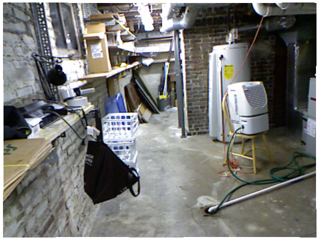

In [18]:
Image.fromarray(img[0].astype(np.uint8))

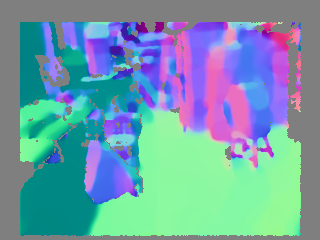

In [19]:
show_normals(norm[0])

In [26]:
list(range(1,int(5*0.5)))

[1]